- author: Lee Meng
- date: 2018-04-14 15:10
- title: 淺談資料視覺化以及 ggplot2 實踐
- slug: data-visualization-from-matplotlib-to-ggplot2
- tags: R, visualization, ggplot2, 資料視覺化
- description: 這篇主要描述自己以往在利用 Python 做資料視覺化時常犯的思維瑕疵，而該思維如何在接觸 R 的 ggplot2 以後得到改善。本文會試著說明資料視覺化的本質為何，以及在設計視覺化時，概念上應該包含什麼要素以及步驟。最後展示如何透過 ggplot2 活用前述的概念，來實際做資料視覺化。
- summary: 這篇主要描述自己以往在利用 Python 做資料視覺化時常犯的思維瑕疵，而該思維如何在接觸 R 的 ggplot2 以後得到改善。本文會試著說明資料視覺化的本質為何，以及在設計視覺化時，概念上應該包含什麼要素以及步驟。最後展示如何透過 ggplot2 活用前述的概念，來實際做資料視覺化。
- image: neven-krcmarek-145603-unsplash.jpg
- image_credit_url: https://unsplash.com/photos/V4EOZj7g1gw?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText

這篇主要描述自己以往在利用 Python 做資料視覺化 (data visualization) 時常犯的思維瑕疵，而該思維如何在接觸 R 的 [ggplot2](http://ggplot2.org/) 以後得到改善。

本文會試著說明資料視覺化的本質為何，以及在設計視覺化時，概念上應該包含什麼要素以及步驟。最後展示如何透過 ggplot2 活用前述的概念，來實際做資料視覺化。

## 目錄

文章內容大致上會分為以下幾個小節：
- [資料視覺化是資料與圖的直接映射？](#資料視覺化是資料與圖的直接映射？)
- [資料視覺化應該是 ..](#資料視覺化應該是-..)
- [ggplot2 實踐](#ggplot2-實踐)
- [結語](#結語)
- [References](#References)

## 資料視覺化是資料與圖的直接映射？

身為一個 Python 起家的資料科學家，在做資料視覺化的時候，我很自然地使用 Python ecosystem 裡像是 [matplotlib](https://matplotlib.org/) 以及 [seaborn](https://seaborn.pydata.org/) 等繪圖 packages。針對手中的資料，我會想辦法找到一個「對應」的圖然後把資料塞進去。簡單無腦 _(:3 」∠)_ 

舉例來說，當我們手上有三個變數 x, y, z 且其各自的資料型態為：
- x: [定量變數 (quantitative)](https://zh.wikibooks.org/zh-hant/%E7%B5%B1%E8%A8%88%E5%AD%B8/%E7%B5%B1%E8%A8%88%E8%B3%87%E6%96%99)
- y: 定量變數
- z: [定性變數（categorical）](https://zh.wikibooks.org/zh-hant/%E7%B5%B1%E8%A8%88%E5%AD%B8/%E7%B5%B1%E8%A8%88%E8%B3%87%E6%96%99)

則我們想要進行資料視覺化的時候有幾種選擇：
- 想分析 x, y -> 都是定量資料 -> 散佈圖 (scatter plot)
- 想分析 x, z -> 一定量一定性 -> 長條圖 (bar chart)

在這，「資料視覺化」的定義是一種映射關係 (mapping)：也就是如何將資料直接對應到某個「特定」圖表形式（折線圖、散佈圖 etc.）。基本上這種映射關係在做簡單的分析的時候沒有什麼問題，但是當想要同時分析/呈現的變數超過兩個 （例： x & y & z ）的時候就不容易找到適合的圖。一個折衷的方法是我們把變數兩兩畫圖做比較，但這樣會侷限我們能分析的資料維度數目，錯過一些有趣的洞見。

## 資料視覺化應該是 ..

### 先確認觀眾及目的

在完成一些 [ggplot2 的 tutorials](#References) 後，可以發現資料視覺化一般依用途可以分為兩種：
- 探索、了解資料特性
- 說故事：將探索過後得到的洞見 (insight) 傳達給其他人

!image
- dark
- ggplot2/data-vis-purpose.png
- 搞清楚資料視覺化的目的以及觀眾是重要的第一步
- https://www.datacamp.com/courses/data-visualization-with-ggplot2-1

依照目的以及觀眾的不同，資料視覺化的方式會有所不同。一個常見的例子是當我們第一次接觸某個資料集。這時候資料視覺化的觀眾是自己，目的是在最短的時間了解資料特性。則這時我們在做圖的時候的要求就可以很寬鬆，像是不加上標題，或是只要能做出自己能理解的視覺化即可。

### 正式定義

在確認觀眾及目的以後，我們終於可以開始進行資料視覺化了！資料視覺化的定義因人而異，而這邊我想給出一個非常直觀的定義：

!quote
- 資料視覺化是將資料中的變數映射到視覺變數上，進而有效且有意義地呈現資料的樣貌

一些常見且肉眼容易識別的視覺變數 / 刻度（visual variables / scales）包含：
- 位置（x / y axis）
- 顏色（color）
- 大小（size）
- 透明程度（alpha）
- 填滿（fill）
- 形狀（shape）

用更口語的方式來解釋：在做資料視覺化的時候，我們希望能將

- 肉眼難以分析的資料

對應到：

- 肉眼容易解讀的視覺元素

透過這個映射關係，我們可以將原本的變數的數值變化也映射到視覺變數的變化。而因為我們人類容易區別視覺變數的變化（位置差異、大小長度變化 etc），我們能更容易地理解原始資料的樣貌、變化以及模式。

舉例來說，我們可以：
- 把不同捷運路線（文湖線、板南線）對應到不同顏色
- 把各國的 GDP 對應到點的大小
- 把某個資料的年份對應到 Ｘ 軸，越右邊代表越接近現代

### 一個簡單例子

In [ ]:
#ignore
# 產生 sample image 用
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

y = [np.random.randn() for _ in range(1000) ]
print(f'y = {[round(i, 3) for i in y[:5]]} ...')
plt.plot(y);

事實上，我們可能平常每天都在做資料視覺化而不自知。比方說我們有一個數列 `y`：

```python
y = [-2.055, -1.132, -0.522, -1.229, 0.013 .. ]
```

光是看這個數字，肉眼無法看出什麼模式，但我們可以簡單畫個圖：

!image
- dark
- style:width:70%;
- ggplot2/simple-visual-encoding.png

這邊我們利用視覺變數「Y軸位置」來呈現數值的變化，可以馬上看出數列裡頭的值都落在 -3 到 3 之間，而這是因為我們肉眼很容易辨別「位置」這個視覺變數的變化。

### 圖像的分層文法

在 [A Layered Grammar of Graphics](http://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf) 裡頭，[Hadley Wickham](http://hadley.nz/) 闡述所謂的圖像（包含由資料視覺化產生的圖像）實際上如同我們平常使用的語言，是有文法的。而其文法可以拆成 7 個部分（層）。前述的

- 原始資料 = 資料層（Data）
- 視覺變數層（Visual variables = Aesthetics）

則恰好是這個架構裡頭最底下的兩層。視覺變數是我為了方便理解建立的名詞，在原文以及 ggplot2 裡頭被稱作 **Aesthetics**。（中文翻作「美學」，當初看好久也無法理解啊 (╯°Д°)╯ ┻━┻）

!image
- dark
- style:width:80%;
- ggplot2/layered-grammar-of-graphics.png
- 圖像的分層文法
- https://www.datacamp.com/courses/data-visualization-with-ggplot2-1

看到這你一定會「哇靠那我每次畫個圖都要實作七層？」。實際上不需要，上面幾層像是主題（Theme）比較像是裝飾品，給我們更大的自由與彈性來訂製（customize）視覺化結果。在下一節我們會看到，ggplot2 會自動幫我們設定合適的主題或座標。（如果沒特別指定的話）

但一般而言，一個圖像最基本的組成是底下三層。也就是除了前述的兩層（資料、視覺變數）以外還需要加上

- 幾何圖形層（Geometries）

為何還要這層？假如我們有了資料，決定了視覺變數（第二層，例：把資料中的變數 A 對應到 X 軸；變數 B 對應到 Y 軸）後，實際上就可以畫一個充滿點（point）的散佈圖了不是嗎？

這樣的思維如同[資料視覺化是資料與圖的直接映射？](#資料視覺化是資料與圖的直接映射？)部分所提到的，有所瑕疵。如果變數 A 是分類型變數（Categorical）的話，單純以**點**為圖形的散佈圖就會變得十分難以理解（下圖左）；這時候以**長條**為圖形（下圖右）的方式會比較清楚：

!image
- dark
- ggplot2/make-geom-layer-independent.png
- 獨立幾何圖形層，讓資料視覺化不再侷限於「我要畫什麼圖」，而是「我想要怎麼畫」

將「幾何圖形」這個選擇獨立出來一層讓我們在資料視覺化的時候有更大的彈性。有了這些基本概念以後，我們可以開始嘗試使用 ggplot2 來實際做一些資料視覺化。

## ggplot2 實踐
在這個章節裡頭我們將使用 Kaggle 的 [Ramen Ratings](https://www.kaggle.com/residentmario/ramen-ratings/data) 來做資料視覺化。這資料集紀錄了各國泡麵所得到的星星數。首先我們要先載入這次的主角：R 語言裡頭最著名的視覺化 package ggplot2。[dplyr](http://yaojenkuo.io/r_programming/ch14#(1) 則是 R 語言用來處理資料的 package。

### 載入 packages

In [25]:
library(ggplot2)
library(dplyr)

值得一提的是它們都是同屬於 [TidyVerse](https://medium.com/datainpoint/tidyverse-r-%E8%AA%9E%E8%A8%80%E5%AD%B8%E7%BF%92%E4%B9%8B%E6%97%85%E7%9A%84%E6%96%B0%E8%B5%B7%E9%BB%9E-3b01ca6a348c) 的一員。TidyVerse 是 R 裡頭常被用來做資料科學的 packages 的集合，以 Python 來說大概就像是 Pandas + Matplotlib + Numpy 的感覺吧。

### 載入資料 + 簡單資料處理
如下註解所示，這邊將資料集讀入，做一些簡單的資料型態轉變後選擇一部分的資料集（subset）來做之後的視覺化：

In [18]:
# 將 CSV 檔案載入成資料框架（dataframe）
ramen_all <- read.csv("datasets//ramen-ratings.csv")

# 將「星星數」轉成定量資料
ramen_all$Stars <- as.numeric(ramen_all$Stars) 

# Subset 資料，選擇拉麵數量前幾多的國家方便 demo
ramen <- ramen_all %>%
  filter(Country %in% count(ramen_all, Country, sort = TRUE)[1:6, 1, drop=TRUE]) %>%
  filter(Style %in% count(ramen_all, Style, sort = TRUE)[1:4, 1 , drop=TRUE])

除了我們使用 dplyr 的 `filter` 依照條件 subset 資料集以外，值得一提的是 pipe 運算子 `%>%`。它是前面提到的 TidyVerse 裡頭的 packages 共享的介面（interface），將前一個函示的輸出當作下一個函式的輸入，讓我們可以把運算全部串（chain）在一起。在 Linux 裡頭就是如同 `|` 的存在。

而實際我們的資料長這樣：

In [19]:
head(ramen)

Review..,Brand,Variety,Style,Country,Stars,Top.Ten
2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,37,
2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles,Pack,Taiwan,7,
2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,16,
2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,19,
2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,47,
2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,39,


### 簡單資料視覺化

有了資料，讓我們再確定一下資料視覺化的目的及觀眾：
- 目的：探索資料
- 觀眾：我們自己

這樣的條件讓我們知道視覺化的條件是快速做出結果，不需調整如標題、主題的設定。

現在讓我們問一些簡單的問題。像是
1. 泡麵的包裝（碗裝、袋裝等）各佔多少比例？
2. 不同國家各有多少泡麵在資料集裡頭？
3. 不同包裝的泡麵所得到的星星總數，在不同國家有什麼差異嗎？

其中一種能解決第一個問題的資料視覺化是：

In [20]:
#ignore
# 用來調整圖片大小以及 Grid 設定
library(gridExtra)
options(repr.plot.width = 4, repr.plot.height = 3)

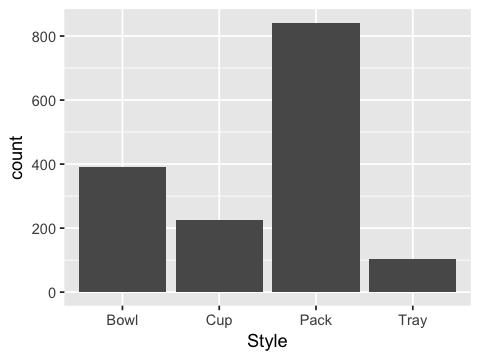

In [56]:
ggplot(ramen, aes(x = Style)) + geom_bar()

在 

```r
ggplot(ramen, aes(x = Style)) + geom_bar()
```

裡頭，我們實際上已經建構了圖表最基礎的三層元素：
- 資料層： `ramen` 告訴 ggplot2 使用此資料框架
- 視覺變數層： `aes(x = Style)` 告訴 ggplot2 我們將使用「 X 軸位置」這個視覺變數來反映泡麵包裝 `Style` 這個變數的變化
    - 因為包裝的值有四種可能，你可以想像 ggplot2 已經準備好要幫你在 X 軸上的四個位置畫圖
    - `aes` 是我們前面提到 **aesthetics** 的縮寫
- 幾何圖形層： `geom_bar()` 告訴 ggplot 去計算對應到 `x` 視覺變數的變數裡頭，所有值的出現次數後將結果以**長條**來呈現

我們通常透過 `+` 來疊加不同層的結果。

### 基本層數缺一不可

上面的例子很簡單，但假如我們沒有指定幾何圖形層的話，圖會長什麼樣子呢？

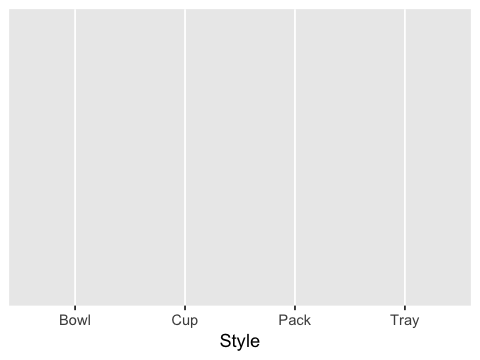

In [24]:
ggplot(ramen, aes(x = Style))

就像我們剛剛所說的，雖然 ggplot2 已經知道要用什麼資料框架、要用什麼視覺變數，不知道要用什麼圖形表示的話就會是空白一張圖。

### 另個簡單例子

讓我們依樣畫葫蘆，來解決第二個問題：
- 不同國家各有多少泡麵在資料集裡頭？

In [42]:
#ignore
options(repr.plot.width = 8, repr.plot.height = 4)

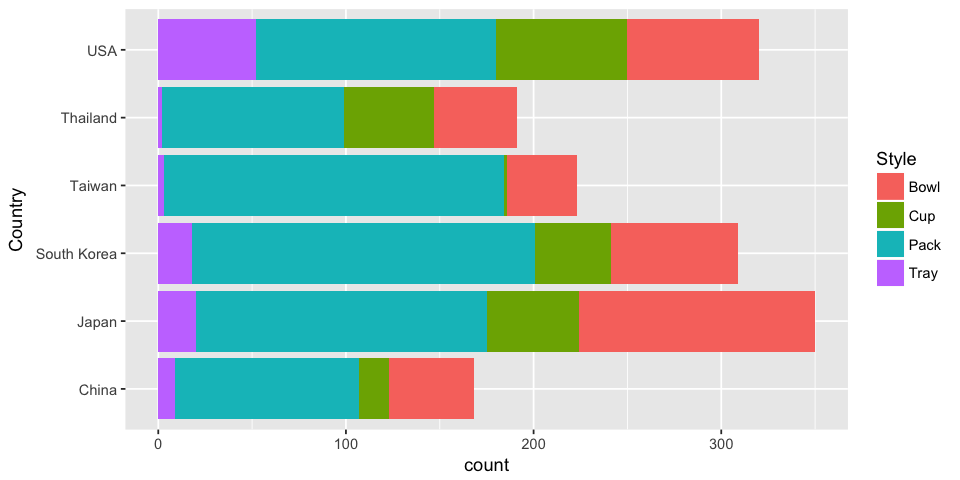

In [43]:
ggplot(ramen, aes(x = Country, fill = Style)) + 
  geom_bar() + 
  coord_flip()

<br>
這邊有兩個值得注意的地方：
1. 除了基本的三層以外，我們透過 `+ coord_flip()` 額外對座標層（Coordinates）做操作，請 ggplot2 把 x, y 軸互換。
2. 透過 `aes(..., fill = Style)` 裡頭的 `fill = Style` ，我們告訴 ggplot2 將長條圖裡頭的填滿空間（fill）這個視覺變數，依照泡麵包裝（Style）做變化

第二點是在做資料視覺化的時候，想辦法增加[資料墨水量（Data Ink Ratio）](https://en.wikipedia.org/wiki/Edward_Tufte)的例子。透過增加顯示在同張圖上的變數數目，進而提高該圖能傳達的訊息量。

舉例而言，我們可以很明顯地看到，在這資料集裡頭，台灣的杯裝泡麵（Cup）沒有被記錄到多少；而日本被記錄到的泡麵量最多，且袋裝（Pack）數目最多。這些是在我們沒有用「填滿」這個視覺變數時無法察覺的。而在 ggplot2 裡，要實現這種視覺化非常容易。

### 複雜例子
讓我們解決最後一個問題：
- 不同包裝的泡麵所得到的星星總數，在不同國家有什麼差異嗎？

資料視覺化一個有趣的地方就是：同個問題不同的人會有不同的做法。而針對這問題其中一種做法是：
1. 將包裝 `Style` 對應到 X 軸、星星數 `Stars` 對應到 Y 軸，然後使用長條 `geom_bar` 顯示數值
2. 依照每個國家重複步驟一

而 ggplot2 的實作為：

In [46]:
#ignore
options(repr.plot.width = 8, repr.plot.height = 6)

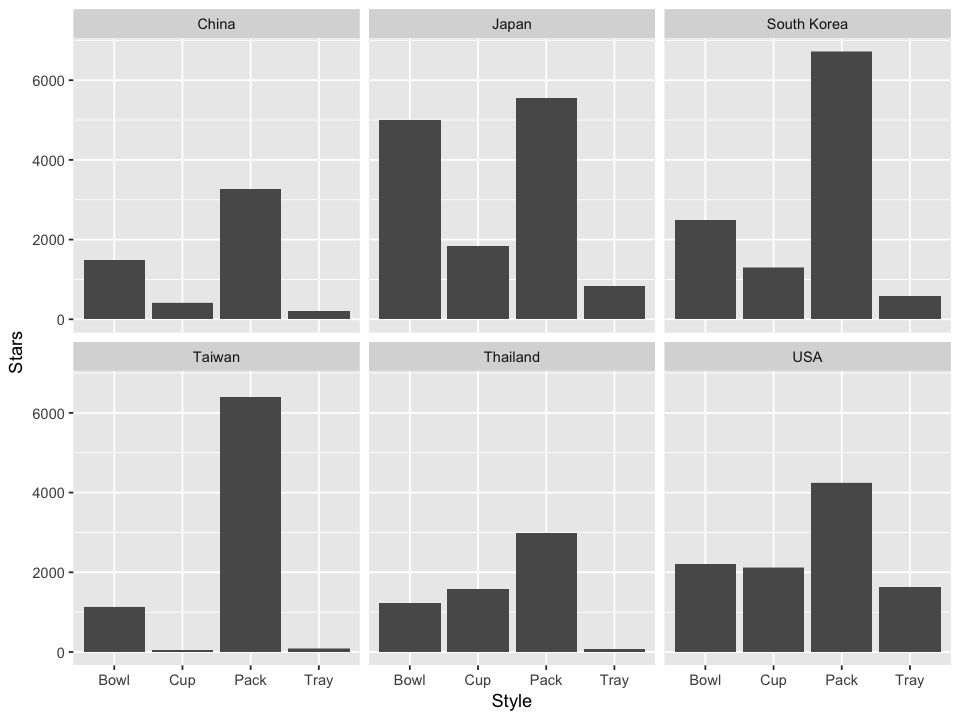

In [47]:
ggplot(ramen, aes(x = Style, y = Stars)) +
  geom_bar(stat = "identity") + 
  facet_wrap( ~ Country)

<br>
實際上在上面的程式碼裡頭，我們多操作了額外兩層：
- 統計層（Statistics）：專門負責匯總資料
- 小平面層（Facets）：依照選定的變數分別畫圖，如上述的步驟二

首先 ggplot2 的 `geom_bar` 預設只需要 `x` 視覺變數，因為匯總資料的統計層會把 x 依照不同的值分別計數（也就是各個包裝的數量），然後讓 `geom_bar` 顯示。但我們並不希望 `geom_bar` 使用這個數值，因此使用 `geom_bar` 裡頭的 `stat = "identity"` 是告訴統計層不要分別計數，而是使用我們給定的星星數 `y` 。


而 `facet_wrap( ~ Country)` 則是告訴小平面層依照 `Country` 這個變數重複畫

```r
ggplot(ramen, aes(x = Style, y = Stars)) +
  geom_bar(stat = "identity")
```

注意所有的圖的 x, y 軸都是一致的，方便我們做比較。

## 結語

資料視覺化需要統計知識以及設計美感，涵蓋範圍非常廣大。這篇雖然打了落落長，但真的只有碰到皮毛（淚）。資料視覺化感覺都可以打個系列文了。但最後再次重申資料視覺化的定義：

!quote
- 資料視覺化是將資料中的變數映射到視覺變數上，進而有效且有意義地呈現資料的樣貌

總之先確認你的觀眾與目的，選好你想要觀察的變數，選擇適當的視覺變數做可視化吧！

## References
- [DataCamp - Data Visualization with ggplot2 (Part 1)](https://www.datacamp.com/courses/data-visualization-with-ggplot2-1)
- [r-statistics.co - ggplot2 tutorial](http://r-statistics.co/ggplot2-Tutorial-With-R.html)
- [Safari - Data Visualization in R With ggplot2](https://www.safaribooksonline.com/library/view/data-visualization-in/9781491963661/)

In [ ]:
#ignore
   
    
    
    data overload: 
* 像是 scatter plat 的 over-plotting 問題
* 太多 variable


* 了解 grammar of graphics, 不受限於「 需 這是 tell the story 的步驟，在做資料分析的時候可能是先看有什麼 variables 
* Aesthetic 跟 attributes 的差異
*  
